# scikit-learn-svm

Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

* Support Vector Machine Classifier
* Support Vector Machine with Kernels Classifier

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn;
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

/Users/Misrab/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Support Vector Machine Classifier

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs draw a boundary between clusters of data.  SVMs attempt to maximize the margin between sets of points.  Many lines can be drawn to separate the points above:

Let's show a quick example of support vector classification. First we need to create a dataset:

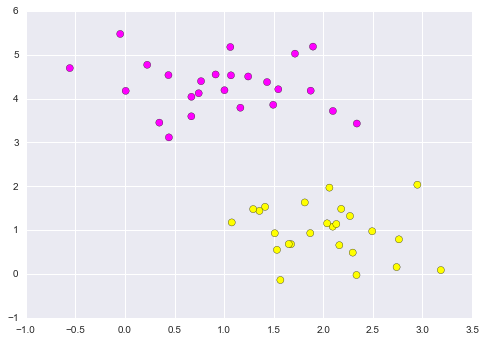

In [2]:
#Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
#X : array of shape [n_samples, n_features:default=2] 
#The generated samples.
#y : array of shape [n_samples]
#The integer labels for cluster membership of each sample.

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

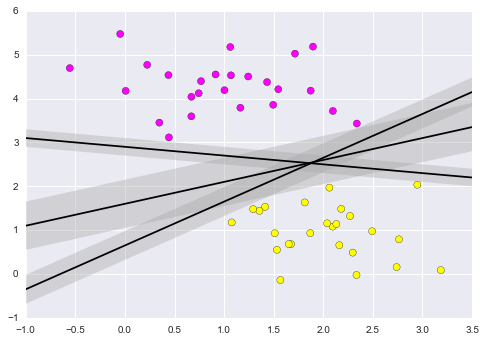

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
xfit = np.linspace(-1, 3.5) #Generate an array if points from -1 to 3.5

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5); #Gridbox

These are three very different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

**Support Vector Machines - Maximizing the Margin**

Notice here that if we want to maximize this width, the middle fit is clearly the best. This is the intuition of support vector machines, which optimize a linear discriminant model in conjunction with a margin representing the perpendicular distance between the datasets.

**Let's Try**

Fit the model:

In [4]:
#To-do for student!

#Import sklearn.svm 

#Create a linear svm classifier

#Fit data!

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Lets see it in action**

Plot the boundary:

In [5]:
import warnings
warnings.filterwarnings('ignore')

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

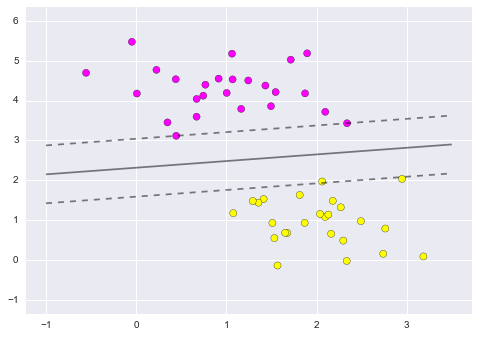

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

In the following plot the dashed lines touch a couple of the points known as *support vectors*, which are stored in the ``support_vectors_`` attribute of the classifier:

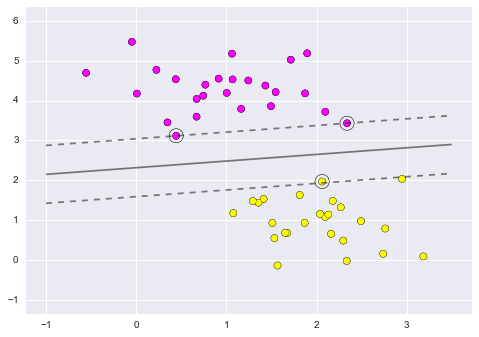

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');
plot_svc_decision_function(clf);

Use IPython's ``interact`` functionality to explore how the distribution of points affects the support vectors and the discriminative fit:

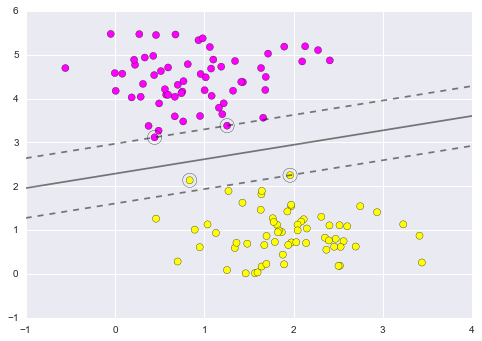

In [8]:
from IPython.html.widgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

## Support Vector Machine with Kernels Classifier

Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points:

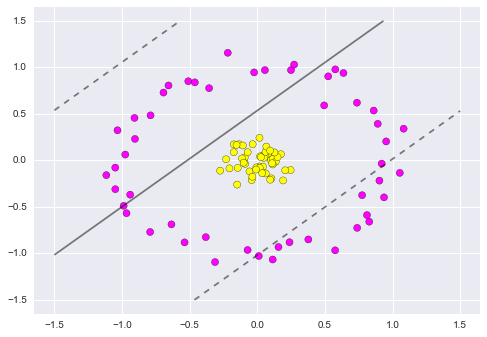

In [9]:
from sklearn.datasets.samples_generator import make_circles
X1, y1 = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X1, y1)

plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='spring')
plot_svc_decision_function(clf);

Clearly, no linear discrimination will ever separate these data. 

A simple model that could be useful is a **radial basis function**:

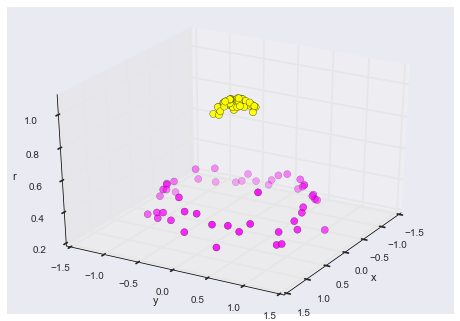

In [10]:
r = np.exp(-(X1[:, 0] ** 2 + X1[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X1[:, 0], X1[:, 1], r, c=y1, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

In three dimensions, there is a clear separation between the data.  Run the SVM with the rbf kernel:

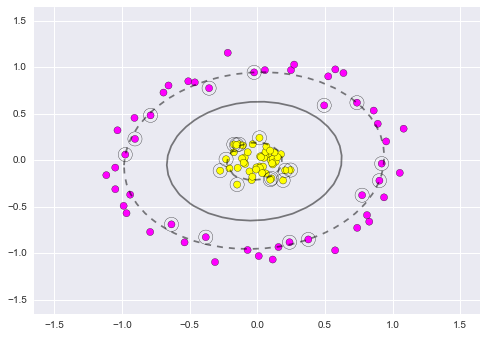

In [11]:
#To-do for student!

#Import sklearn.svm 

#Create a radial basis function (rbf) svm classifier named clf1

#Fit data!

#Plot is done!
clf1 = SVC(kernel='rbf')
clf1.fit(X1, y1)

plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='spring')
plot_svc_decision_function(clf1)
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1],
            s=200, facecolors='none');

SVM additional notes:
* When using an SVM you need to choose the right values for parameters such as c and gamma.  Model validation can help to determine these optimal values by trial and error.
* SVMs run in O(n^3) performance.  LinearSVC is scalable, SVC does not seem to be scalable.  For large data sets try transforming the data to a smaller space and use LinearSVC with rbf.

## Explore/Plot different SVM classifiers in the Iris dataset

Credits: Forked from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py

In [5]:
#Our favourite data
from sklearn import datasets
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
iris = datasets.load_iris()
X2 = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y2 = iris.target

svc = SVC(kernel='linear').fit(X2, y2)
rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X2, y2)
poly_svc = SVC(kernel='poly', degree=3).fit(X2, y2)
lin_svc = LinearSVC().fit(X2, y2)

#Student TO-DO:

#1. Declare X to be the two features: sepal length, sepal width
#Hint: Try iris.feature_names to print column names

#2. Declare y to be iris.target
#Hint iris.target

#3. Declare 4 Classifiers: 
        #1. Declare svc to be svm classifier where kernel='linear'
        #2. Declare rbf_svc to be svm classifier where kernel='rbf', try gamma=0.7
        #3. Declare poly_svc to be svm classifier where kernel='poly', degree=3
        #4. Declare lin_svc LinearSVC
X2

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

**Let's plot them!**:

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

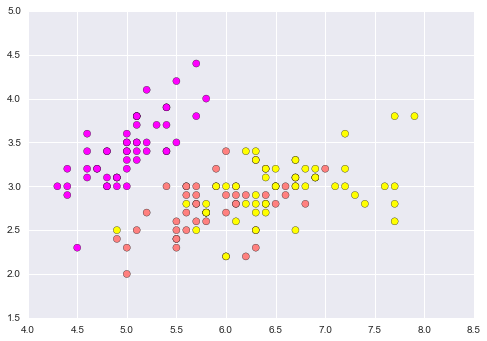

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='spring')
svc = SVC(kernel='linear')
svc.fit(X2, y2)

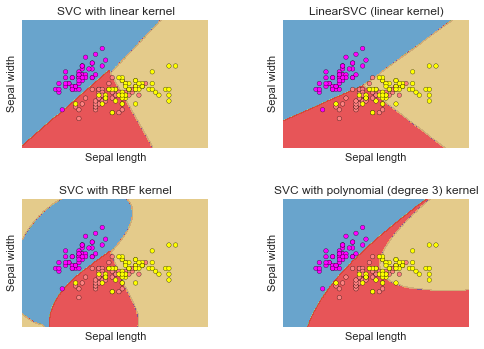

In [23]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='spring')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:547: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.18. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


ValueError: setting an array element with a sequence.

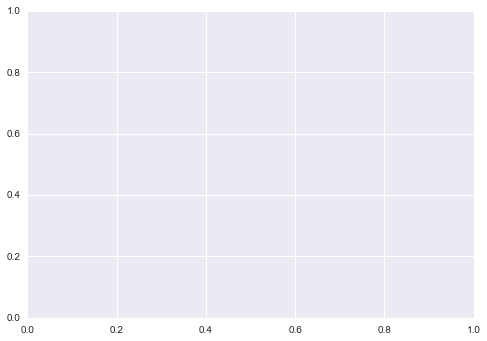

In [13]:
plot_svc_decision_function(svc)